<a href="https://colab.research.google.com/github/Naditya206/Machine-Learning/blob/main/TG6_REGRESI_244107023008_NADITYA_PRASTIA_ANDINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== INFORMASI DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Statistik Deskriptif:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.0

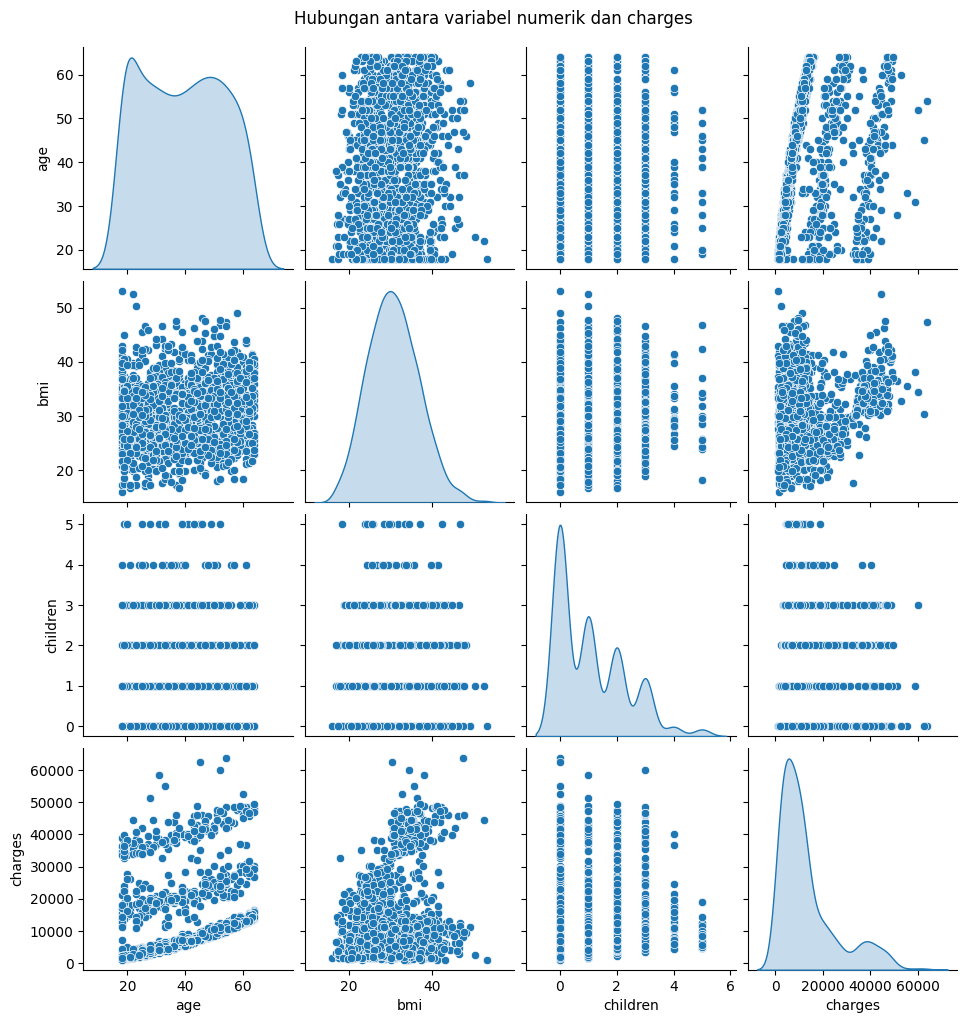

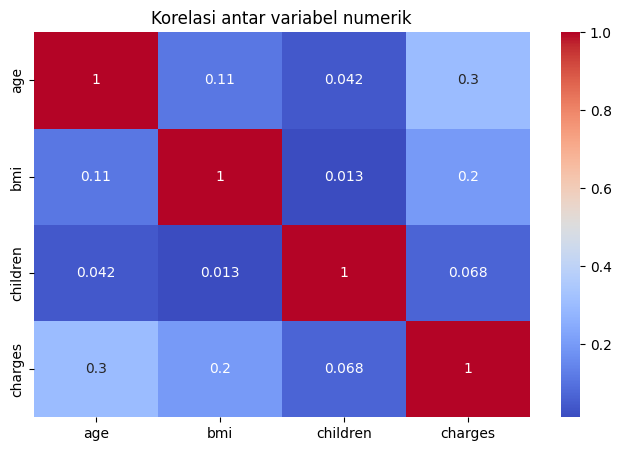


=== HASIL EVALUASI MODEL ===
R-squared: 0.7836
Mean Squared Error (MSE): 33596915.85
Mean Absolute Error (MAE): 4181.19


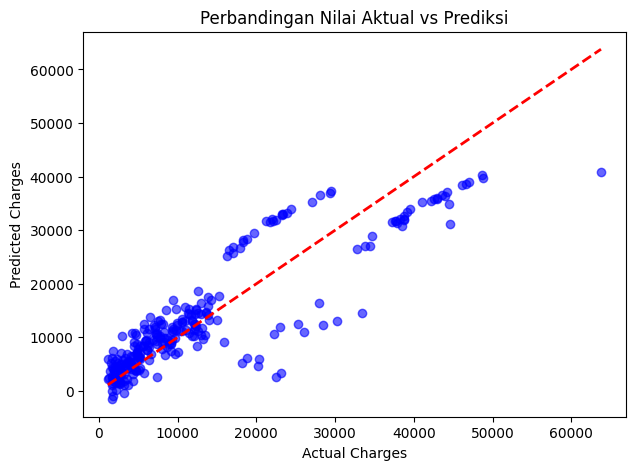

In [1]:
# --- Import Library ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- 1. Load Dataset ---
df = pd.read_csv("insurance.csv")

# --- 2. Deskripsi Dataset ---
print("=== INFORMASI DATASET ===")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())
print("\nContoh Data:")
print(df.head())

# --- Penjelasan singkat variabel ---
# age: usia individu
# sex: jenis kelamin (male/female)
# bmi: body mass index
# children: jumlah anak yang ditanggung asuransi
# smoker: apakah perokok atau tidak (yes/no)
# region: wilayah tempat tinggal (northeast, northwest, southeast, southwest)
# charges: biaya medis personal (target variabel)

# --- 3. Visualisasi awal ---
sns.pairplot(df[['age', 'bmi', 'children', 'charges']], diag_kind='kde')
plt.suptitle("Hubungan antara variabel numerik dan charges", y=1.02)
plt.show()

# Korelasi
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korelasi antar variabel numerik")
plt.show()

# --- 4. Pisahkan fitur dan target ---
X = df.drop('charges', axis=1)
y = df['charges']

# --- 5. Encoding dan Scaling ---
# Kolom kategorikal
categorical_cols = ['sex', 'smoker', 'region']
# Kolom numerik
numerical_cols = ['age', 'bmi', 'children']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

# --- 6. Split data menjadi train dan test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 7. Buat pipeline model Multiple Linear Regression ---
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# --- 8. Latih model ---
model.fit(X_train, y_train)

# --- 9. Prediksi ---
y_pred = model.predict(X_test)

# --- 10. Evaluasi Model ---
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n=== HASIL EVALUASI MODEL ===")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# --- 11. Visualisasi Prediksi vs Aktual ---
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Perbandingan Nilai Aktual vs Prediksi")
plt.show()

# --- 12. Analisis Singkat ---
# Jika nilai R² mendekati 1, maka model memiliki kemampuan prediksi yang baik.
# MAE dan MSE menunjukkan seberapa jauh prediksi dari nilai sebenarnya.


## Analisis hasil Tugas Praktikum

---

## Deskripsi Dataset

Dataset berisi 1338 data biaya medis individu dengan variabel:
`age`, `sex`, `bmi`, `children`, `smoker`, `region`, dan `charges` (target).

---

## Analisis Data

* Tidak ada missing value.
* `age`, `bmi`, dan `smoker` berpengaruh besar terhadap `charges`.
* Korelasi tertinggi: `smoker` → `charges`.
* `children` dan `region` berpengaruh kecil.

---

## Model & Evaluasi

Langkah:

1. One-Hot Encoding untuk variabel kategorikal.
2. Split data: 80% train, 20% test.
3. Model: `LinearRegression()` dari scikit-learn.
4. Evaluasi:

| Metrik | Nilai         |
| ------ | ------------- |
| R²     | 0.7836        |
| MSE    | 33,596,915.85 |
| MAE    | 4,181.19      |

Visualisasi:

* Titik prediksi mendekati garis aktual → model cukup akurat.

---

## Kesimpulan

* Model menjelaskan **78% variasi biaya medis**.
* Faktor utama: **smoker**, **age**, dan **bmi**.
* Rata-rata kesalahan prediksi ± **$4181**.
* Disarankan uji model non-linear (misal **SVR**) untuk hasil lebih baik.

---